In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df_list = []
filename_list = []
for filename in os.listdir("/home/frankwoods/Desktop/lassie/data/ws23_processed_data"):
    df = pd.read_csv(f"/home/frankwoods/Desktop/lassie/data/ws23_processed_data/{filename}")
    filename_list.append(filename)
    df_list.append(df)
print(filename_list)

['resistance_depth_15.csv', 'resistance_depth_36.csv', 'resistance_depth_50.csv', 'resistance_depth_54.csv', 'resistance_depth_25.csv', 'resistance_depth_69.csv', 'resistance_depth_67.csv', 'resistance_depth_46.csv', 'resistance_depth_1.csv', 'resistance_depth_49.csv', 'resistance_depth_45.csv', 'resistance_depth_4.csv', 'resistance_depth_44.csv', 'resistance_depth_59.csv', 'resistance_depth_64.csv', 'resistance_depth_0.csv', 'resistance_depth_21.csv', 'resistance_depth_71.csv', 'resistance_depth_53.csv', 'resistance_depth_20.csv', 'resistance_depth_75.csv', 'resistance_depth_43.csv', 'resistance_depth_61.csv', 'resistance_depth_40.csv', 'resistance_depth_24.csv', 'resistance_depth_62.csv', 'resistance_depth_65.csv', 'resistance_depth_47.csv', 'resistance_depth_41.csv', 'resistance_depth_13.csv', 'resistance_depth_51.csv', 'resistance_depth_5.csv', 'resistance_depth_2.csv', 'resistance_depth_26.csv', 'resistance_depth_38.csv', 'resistance_depth_63.csv', 'resistance_depth_9.csv', 'resis

In [2]:

def extract_features(df):
    res = df["resistance"]
    dep = df["depth"]
    return pd.DataFrame([{
        "res_mean": res.mean(),
        "res_max": res.max(),
        "slope": res.max() / dep.max(),
        "depth_max": dep.max(),
    }])

# shape (n,m) where n is number of df and m is extracted feaetures
representation_list = []
for df in df_list:
    representation_list.append(extract_features(df))
print(f"example: {representation_list[0]}")


example:    res_mean    res_max        slope  depth_max
0  9.181236  36.862616  3354.996479   0.010987


# Visualize Extracted Features Histograms

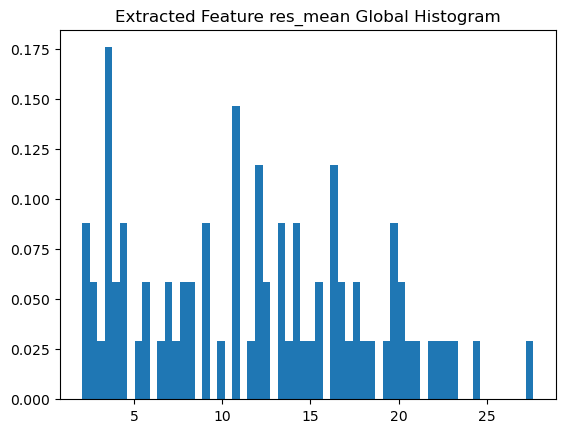

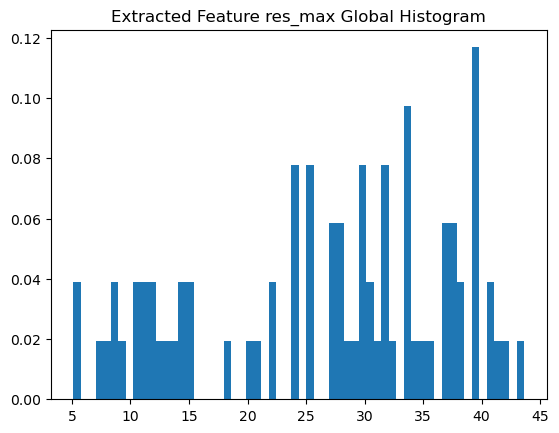

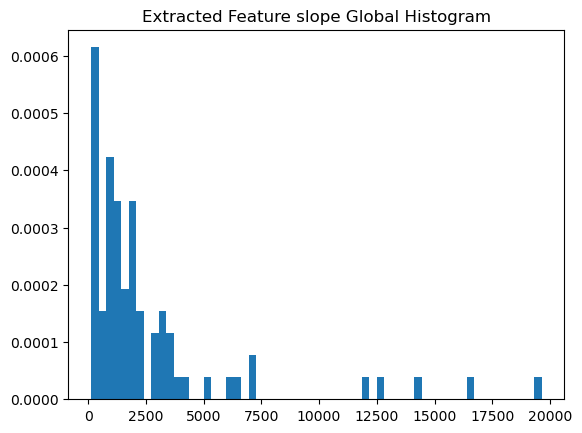

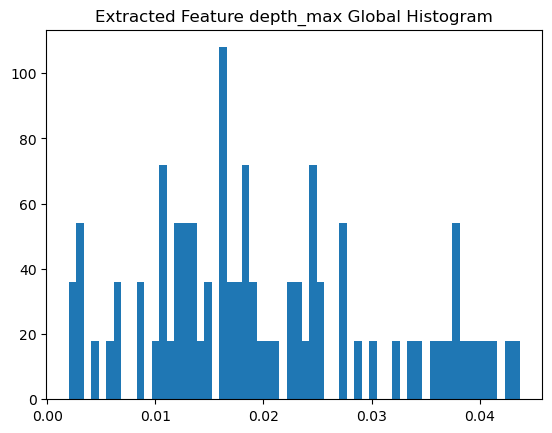

In [3]:
representation_df  = pd.concat(representation_list, axis=0, ignore_index=True)
# # print(representation_df)
def plot_feature_dist(representation_df):
    for col in representation_df.columns:
        plt.hist(representation_df[col], bins=60, density=True)
        plt.title(f"Extracted Feature {col} Global Histogram")
        plt.show()
plot_feature_dist(representation_df)

# Scale Features

   res_mean   res_max     slope  depth_max
0 -0.433934  0.954709  0.771310  -0.855991
1 -1.062086 -1.113715 -0.378524  -0.397709
2  0.680835  1.195836  2.345174  -1.675706
3 -0.804563 -0.238057 -0.312145   0.356622
4  0.025080 -0.147444 -0.300640   0.415958


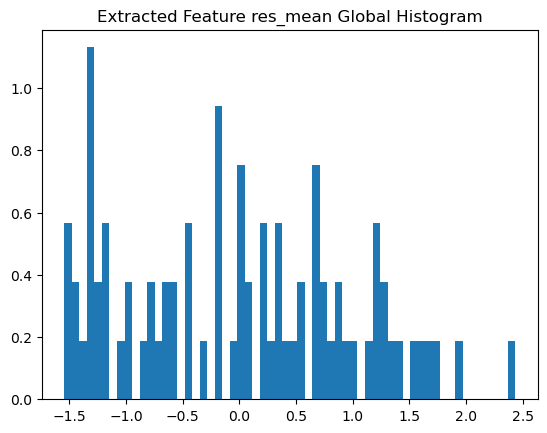

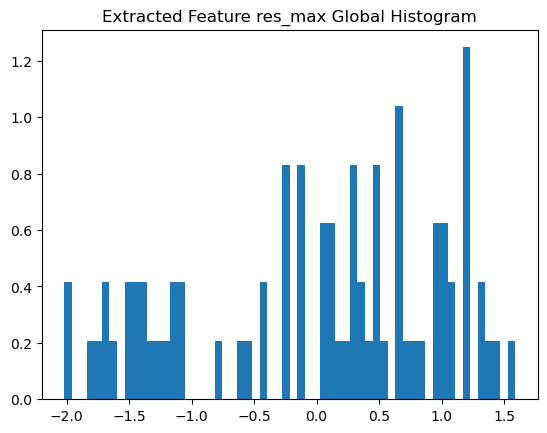

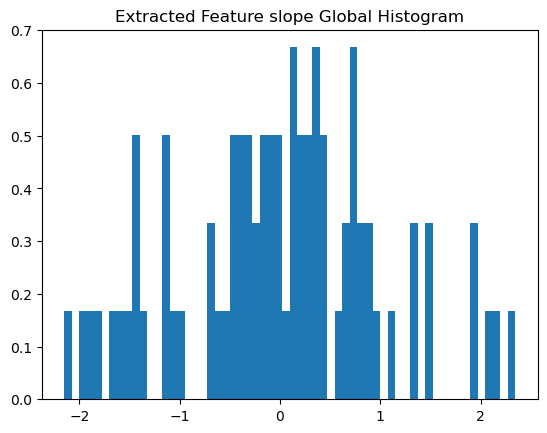

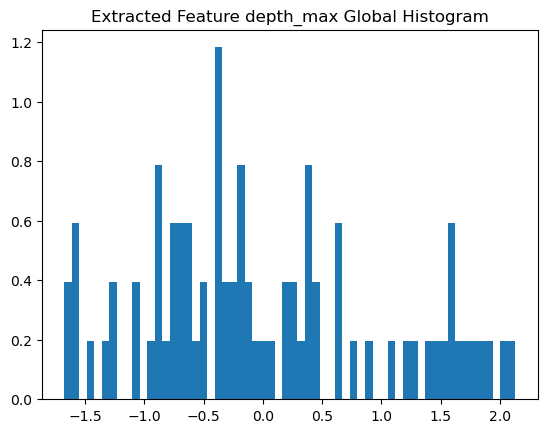

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def transform_features(df):
    df = df.copy()  # avoid modifying original
    # Apply cube root to 'slope'
    if "slope" in df.columns: df['slope'] = np.log(df['slope'])
    # if "skew" in df.columns: df["skew"] = df["skew"] ** 1.1
    # if "kurtosis" in df.columns: df["kurtosis"] = np.sqrt(df["kurtosis"]) 
    # Standardize
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    return df

scaled_representations = transform_features(representation_df)
print(scaled_representations[:5])
plot_feature_dist(scaled_representations)


# Analyze Correlation Matrix

In [5]:
corr_matrix = scaled_representations.corr()
print(corr_matrix)

           res_mean   res_max     slope  depth_max
res_mean   1.000000  0.841775  0.750957  -0.648720
res_max    0.841775  1.000000  0.927786  -0.852738
slope      0.750957  0.927786  1.000000  -0.953215
depth_max -0.648720 -0.852738 -0.953215   1.000000


# Save representation

In [6]:
scaled_representations.to_csv(f"data/features.csv", index=False)